In [3]:
import numpy as np

In [4]:
np.random.seed(1)#for debugging


In [5]:
#step 1: create a dataset
mu_vec1=np.array([0,0,0]) #sample mean
cov_mat1=np.array([[1,0,0],[0,1,0],[0,0,1]]) #sample covariance

class1_sample=np.random.multivariate_normal(mu_vec1,cov_mat1,20).T
print(class1_sample)

[[ 1.62434536 -1.07296862  1.74481176 -0.24937038 -0.3224172  -1.09989127
   0.04221375  1.14472371  0.90085595 -0.93576943 -0.69166075 -0.84520564
  -1.11731035  0.74204416 -0.74715829 -0.63699565  0.12015895 -0.35224985
  -0.20889423  0.93110208]
 [-0.61175641  0.86540763 -0.7612069   1.46210794 -0.38405435 -0.17242821
   0.58281521  0.90159072 -0.68372786 -0.26788808 -0.39675353 -0.67124613
   0.2344157  -0.19183555  1.6924546   0.19091548  0.61720311 -1.1425182
   0.58662319  0.28558733]
 [-0.52817175 -2.3015387   0.3190391  -2.06014071  1.13376944 -0.87785842
  -1.10061918  0.50249434 -0.12289023  0.53035547 -0.6871727  -0.0126646
   1.65980218 -0.88762896  0.05080775  2.10025514  0.30017032 -0.34934272
   0.83898341  0.88514116]]


In [12]:
mu_vec2=np.array([1,1,1]) #sample mean
cov_mat2=np.array([[1,0,0],[0,1,0],[0,0,1]]) #sample coveriance

class2_sample=np.random.multivariate_normal(mu_vec1,cov_mat1,20).T
print(class2_sample)

[[-1.27255876  1.29322588  0.5627611  -0.0731127   1.90465871 -1.62743834
   0.81095167  0.82400562 -1.33195167 -0.89055558 -0.3264995  -0.58652394
   0.62336218  0.12910158  1.55880554  2.44936865 -0.7003985   0.20183018
  -0.12046457 -0.66575452]
 [ 0.31354772 -0.11044703  0.24073709  1.16033857  1.1110567   0.60231928
   1.04444209 -0.56230543 -1.76068856 -1.1191154  -1.34267579 -1.23685338
  -0.43495668  1.6169496   0.1094027  -0.54577417 -0.20339445  0.66102029
  -1.23312074 -1.67419581]
 [ 0.50318481 -0.61736206  0.28066508  0.36949272  0.6590498   0.4202822
  -0.40087819  1.95487808 -1.65072127  1.9560789   1.11438298  0.87583893
   1.40754     0.50274088 -1.2197444  -0.19883786  0.24266944  1.79215821
  -1.18231813  0.82502982]]


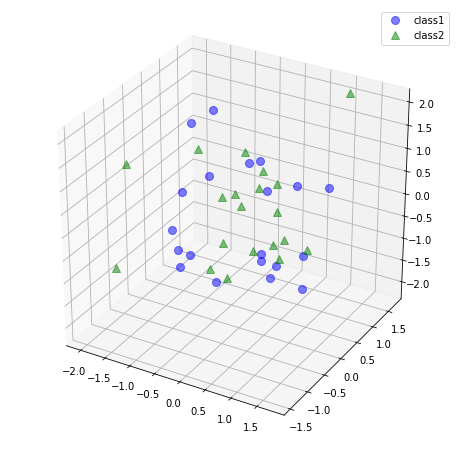

In [7]:
#step2 plot the data
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(8,8))
#3d subplot
ax=fig.add_subplot(111,projection='3d')
#fontsize
plt.rcParams['legend.fontsize']=10
#plot sample
ax.plot(class1_sample[0,:],class1_sample[1,:],class1_sample[2,:],'o',markersize=8,color='blue',alpha=0.5,label='class1')
ax.plot(class2_sample[0,:],class2_sample[1,:],class2_sample[2,:],'^',markersize=8,color='green',alpha=0.5,label='class2')

ax.legend(loc='upper right')
plt.show()

In [8]:
#step3 merge data into big dataset
all_sample=np.concatenate((class1_sample,class2_sample),axis=1)

In [19]:
all_sample

array([[ 1.62434536, -1.07296862,  1.74481176, -0.24937038, -0.3224172 ,
        -1.09989127,  0.04221375,  1.14472371,  0.90085595, -0.93576943,
        -0.69166075, -0.84520564, -1.11731035,  0.74204416, -0.74715829,
        -0.63699565,  0.12015895, -0.35224985, -0.20889423,  0.93110208,
        -0.75439794, -0.29809284,  1.13162939, -1.39649634,  0.16003707,
        -2.02220122,  0.23009474, -0.20075807,  0.19829972,  0.37756379,
         1.19891788, -0.63873041, -0.34385368,  0.69803203,  0.40349164,
         0.16938243, -0.26621851,  0.31515939,  0.35054598, -1.61577235],
       [-0.61175641,  0.86540763, -0.7612069 ,  1.46210794, -0.38405435,
        -0.17242821,  0.58281521,  0.90159072, -0.68372786, -0.26788808,
        -0.39675353, -0.67124613,  0.2344157 , -0.19183555,  1.6924546 ,
         0.19091548,  0.61720311, -1.1425182 ,  0.58662319,  0.28558733,
         1.25286816,  0.48851815,  1.51981682, -1.44411381,  0.87616892,
        -0.30620401,  0.76201118,  0.18656139,  0.

In [20]:
#step4 compute dimensional mean vector which will help compute covariance matrix
#mean for each feature
mean_x=np.mean(all_sample[0,:])
mean_y=np.mean(all_sample[1,:])
mean_z=np.mean(all_sample[2,:])

mean_vector=np.array([[mean_x],[mean_y],[mean_z]])
mean_vector

array([[-0.08332508],
       [ 0.19848315],
       [-0.00757665]])

In [23]:
#step5 compute variance matrix for eigen matrix
cov_matrix=np.zeros([3,3])

for i in range((all_sample.shape[1])):
    cov_matrix+=(all_sample[:,i].reshape(3,1)-mean_vector).dot(all_sample[:,i].reshape(3,1).T)
cov_matrix
    


array([[29.76153645, -0.68921948,  1.31864917],
       [-0.68921948, 22.56859819, -0.32364752],
       [ 1.31864917, -0.32364752, 38.82461287]])

In [29]:
#step6 compute eigen vector & eigen values

eig_val,eig_vec=np.linalg.eig(cov_matrix)

print("eigen value:\n"+str(eig_val)+"\neigen vector:\n"+str(eig_vec))


eigen value:
[39.02320339 29.63081801 22.50072611]
eigen vector:
[[ 0.14276533 -0.98544534  0.09227969]
 [-0.02544109  0.08955022  0.99565733]
 [ 0.98942954  0.14449304  0.01228614]]


In [30]:
#step7 create eigenpair from both and sort them
eig_pairs=[(np.abs(eig_val[i]),eig_vec[:,i])
           for i in range(len(eig_val))]

#sort the (eigenvalue,eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

#visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

39.023203389791476
29.630818009999405
22.500726108525274


In [33]:
#step8 choose k eigen vectors

matrix_w=np.hstack((eig_pairs[0][1].reshape(3,1),eig_pairs[1][1].reshape(3,1)))

matrix_w

array([[ 0.14276533, -0.98544534],
       [-0.02544109,  0.08955022],
       [ 0.98942954,  0.14449304]])

In [34]:
#step9 transform our data using this eigenpair
transformed=matrix_w.T.dot(all_sample)
transformed

array([[-0.27512478, -2.45241   ,  0.58413126, -2.11116313,  1.08552574,
        -1.02121863, -1.09778592,  0.63767215,  0.02441456,  0.3979693 ,
        -0.7685603 , -0.11611956,  1.47678033, -0.76742763, -0.09945549,
         1.98225648,  0.29844959, -0.36687217,  0.78536779,  1.00144826,
         0.36793172, -0.12975864,  2.28536451, -0.66176486,  0.31285559,
         0.53831251, -0.20651487,  0.3723096 , -0.63829046,  1.16834849,
        -0.20486469, -0.02544017, -0.66364668,  1.3225943 , -1.04083479,
        -0.93827817, -1.39743936, -0.82696387,  0.04514525,  0.14537191],
       [-1.73180363,  0.80229304, -1.74148394,  0.07899696,  0.44715418,
         0.94159731, -0.14843992, -0.97471807, -0.96672906,  0.97479287,
         0.54677283,  0.77096378,  1.36187012, -0.87667908,  0.8951847 ,
         0.94829317, -0.01976689,  0.19433263,  0.37961335, -0.76407906,
         0.92972734,  0.32658151, -0.66325855,  1.1739583 , -0.03363962,
         2.08498471, -0.19063239,  0.27379233, -0.

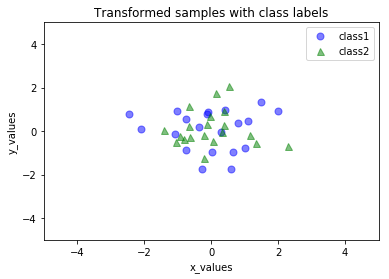

In [35]:
plt.plot(transformed[0,0:20],transformed[1,0:20],'o',markersize=7,color='blue',alpha=0.5,label='class1')
plt.plot(transformed[0,20:40],transformed[1,20:40],'^',markersize=7,color='green',alpha=0.5,label='class2')

plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()